In [1]:
# Importing Packages

import numpy as np
import matplotlib.pyplot as plt
import time

from typing import Optional, Union

import jax
import jax.numpy as jnp
from jax import jit, vmap, block_until_ready, config

from evosax import CMA_ES, SimAnneal, DE

from envs.single_photon_env import SinglePhotonLangevinReadoutEnv

from rl_algos.ppo_continuous import PPO_make_train

## PPO Learning

In [2]:
# Seeding everything

seed = 30

rng = jax.random.PRNGKey(seed)
rng, _rng = jax.random.split(rng)

In [3]:
# Defining Cairo Params and RL Params

tau_0 = 0.398
kappa = 20.0
chi = 0.65 * 2. * jnp.pi
kerr = 0.002
gamma = 1/140
time_coeff = 10.0
snr_coeff = 10.0
smoothness_coeff = 10.0

smoothness_baseline_scale = 1.0 # Use Default Baseline
apply_smoothing = True # Set to True
use_processed_action = False # Set to True to use Transformed Action for Calculations
bandwidth = 250.0 # Remove Bandwidth Constraint
freq_relative_cutoff = 0.1
bandwidth_coeff = 0.
apply_bandwidth_constraint = False

n0 = 43
res_amp_scaling = 1/0.43
actual_max_photons = n0 * (1 - jnp.exp(-0.5 * kappa * tau_0))**2
print(f"Rough Max Photons: {n0}")
print(f"Actual Max Photons: {actual_max_photons}")
nR = 0.01
snr_scale_factor = 1.9
gamma_I = 1/140
num_t1 = 5.0
photon_gamma = 1/1500
init_fid = 1 - 1e-4
photon_weight = 4.0

shot_noise_std = 0. # Remove Any Variation
standard_fid = 1. # Remove Any Variation

env_config = {"kappa": kappa,
    "chi": chi,
    "kerr": kerr,
    "time_coeff": time_coeff,
    "snr_coeff": snr_coeff,
    "smoothness_coeff": smoothness_coeff,
    "smoothness_baseline_scale": smoothness_baseline_scale,
    "apply_smoothing": apply_smoothing,
    "use_processed_action": use_processed_action,
    "bandwidth": bandwidth,
    "freq_relative_cutoff": freq_relative_cutoff,
    "bandwidth_coeff": bandwidth_coeff,
    "apply_bandwidth_constraint": apply_bandwidth_constraint,
    "n0": n0,
    "tau_0": tau_0,
    "res_amp_scaling": res_amp_scaling,
    "nR": nR,
    "snr_scale_factor": snr_scale_factor,
    "gamma_I": gamma_I,
    "photon_gamma": photon_gamma,
    "num_t1": num_t1,
    "init_fid": init_fid,
    "photon_weight": photon_weight,
    "standard_fid": standard_fid,
    "shot_noise_std": shot_noise_std,
}

num_envs = 256
num_updates = 3000
config = {
    "LR": 3e-4,
    "NUM_ENVS": num_envs,
    "NUM_STEPS": 1,
    "NUM_UPDATES": num_updates,
    "UPDATE_EPOCHS": 4,
    "NUM_MINIBATCHES": int(num_envs / 64),
    "CLIP_EPS": 0.2,
    "VALUE_CLIP_EPS": 0.2,
    "ENT_COEF": 0.0,
    "VF_COEF": 0.5,
    "MAX_GRAD_NORM": 0.5,
    "ACTIVATION": "relu6",
    "LAYER_SIZE": 64,
    "ENV_NAME": "single_langevin_env",
    "ENV_PARAMS": env_config,
    "ANNEAL_LR": False,
    "DEBUG": True,
    "DEBUG_ACTION": False,
    "PRINT_RATE": 100,
    "ACTION_PRINT_RATE": 100,
}

Rough Max Photons: 43
Actual Max Photons: 41.40804860100575


In [4]:
single_train = jit(PPO_make_train(config), static_argnums=-1)

print(f"Starting a Run of {num_updates} Updates")
start = time.time()
single_result = single_train(
    _rng, 
    num_envs)
end = time.time()
print(f"time taken: {end - start}")

Starting a Run of 3000 Updates
global update: 100
reward: -10027.127208951575
max pF: 0.5784053450848996
max photon: 1.750933111004997
photon time: 0.1942443388015177
smoothness: 0.23627012971948802


XlaRuntimeError: INTERNAL: Generated function failed: CpuCallback error: KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/interpreters/mlir.py(2366): _wrapped_callback
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/interpreters/pxla.py(1151): __call__
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/profiler.py(336): wrapper
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(1185): _pjit_call_impl_python
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(1229): call_impl_cache_miss
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(1245): _pjit_call_impl
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/core.py(935): process_primitive
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/core.py(447): bind_with_trace
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/core.py(2740): bind
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(168): _python_pjit_helper
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/pjit.py(257): cache_miss
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/jax/_src/traceback_util.py(179): reraise_with_filtered_traceback
  /var/folders/g4/_yhz0jm50s17zz2ms7wwytcr0000gr/T/ipykernel_60020/543495048.py(5): <module>
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3550): run_code
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3490): run_ast_nodes
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3308): run_cell_async
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/async_helpers.py(129): _pseudo_sync_runner
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3103): _run_cell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py(3048): run_cell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/zmqshell.py(549): run_cell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/ipkernel.py(429): do_execute
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(766): execute_request
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(424): dispatch_shell
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(518): process_one
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelbase.py(529): dispatch_queue
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py(80): _run
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py(1905): _run_once
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py(601): run_forever
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/tornado/platform/asyncio.py(205): start
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel/kernelapp.py(739): start
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/traitlets/config/application.py(1077): launch_instance
  /Users/chatt07/Desktop/readout_env/lib/python3.9/site-packages/ipykernel_launcher.py(17): <module>
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py(87): _run_code
  /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py(197): _run_module_as_main


In [5]:
# Extracting Results

metrics = single_result["metrics"]

rewards = metrics["reward"]
max_pFs = metrics["max pF"]
max_photons = metrics["max photon"]
photon_times = metrics["photon time"]
smoothnesses = metrics["smoothness"]
actions = metrics["action"]

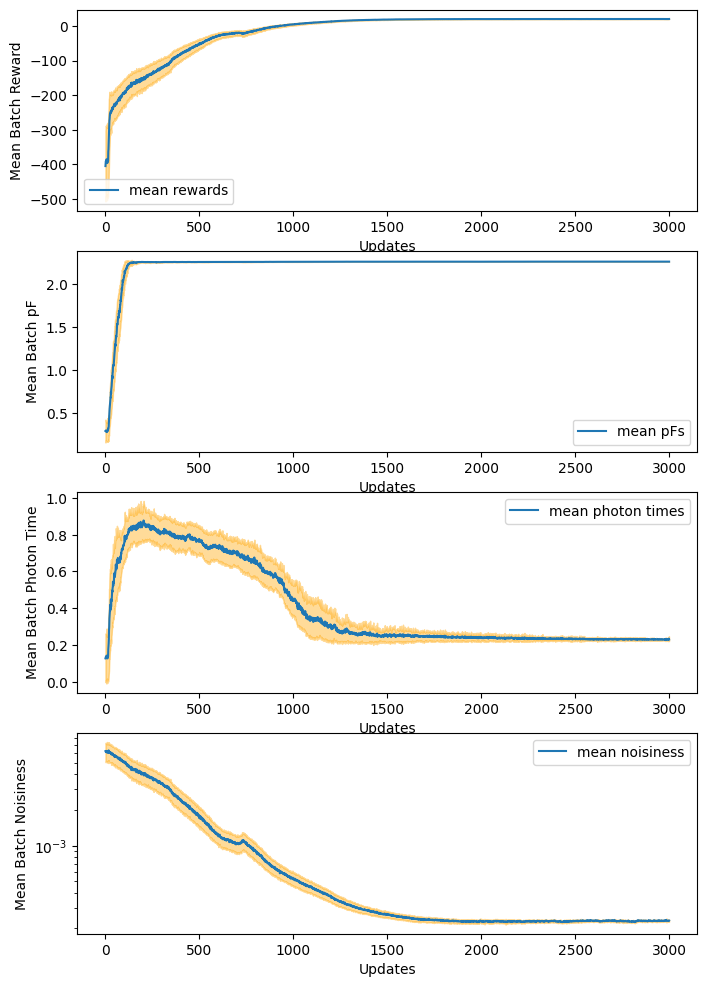

In [6]:
mean_rewards = jnp.mean(rewards, axis=-1)
std_rewards = jnp.std(rewards, axis=-1)

mean_pFs = jnp.mean(max_pFs, axis=-1)
std_pFs = jnp.std(max_pFs, axis=-1)

mean_times = jnp.mean(photon_times, axis=-1)
std_times = jnp.std(photon_times, axis=-1)

mean_smoothnesses = jnp.mean(smoothnesses, axis=-1)
std_smoothnesses = jnp.std(smoothnesses, axis=-1)

fig, ax = plt.subplots(4, figsize=(8.0, 12.0))

ax[0].plot(mean_rewards, label='mean rewards')
ax[0].fill_between(jnp.arange(num_updates), mean_rewards - std_rewards, mean_rewards + std_rewards, color='orange', alpha=0.4)
ax[0].set_xlabel('Updates')
ax[0].set_ylabel('Mean Batch Reward')
ax[0].legend()

ax[1].plot(mean_pFs, label='mean pFs')
ax[1].fill_between(jnp.arange(num_updates), mean_pFs - std_pFs, mean_pFs + std_pFs, color='orange', alpha=0.4)
ax[1].set_xlabel('Updates')
ax[1].set_ylabel('Mean Batch pF')
ax[1].legend()

ax[2].plot(mean_times, label='mean photon times')
ax[2].fill_between(jnp.arange(num_updates), mean_times - std_times, mean_times + std_times, color='orange', alpha=0.4)
ax[2].set_xlabel('Updates')
ax[2].set_ylabel('Mean Batch Photon Time')
ax[2].legend()

ax[3].plot(mean_smoothnesses, label='mean noisiness')
ax[3].fill_between(jnp.arange(num_updates), mean_smoothnesses - std_smoothnesses, mean_smoothnesses + std_smoothnesses, color='orange', alpha=0.4)
ax[3].set_xlabel('Updates')
ax[3].set_ylabel('Mean Batch Noisiness')
ax[3].set_yscale('log')
ax[3].legend()

plt.show()

In [4]:
### Plotting Final PPO Action ###

from utils import photon_env_dicts

env = photon_env_dicts()[config["ENV_NAME"]](**config["ENV_PARAMS"])

mean_actions = jnp.mean(actions, axis=1)

prepped_action = env.prepare_action(mean_actions[-1])

plt.plot(-prepped_action)

NameError: name 'actions' is not defined

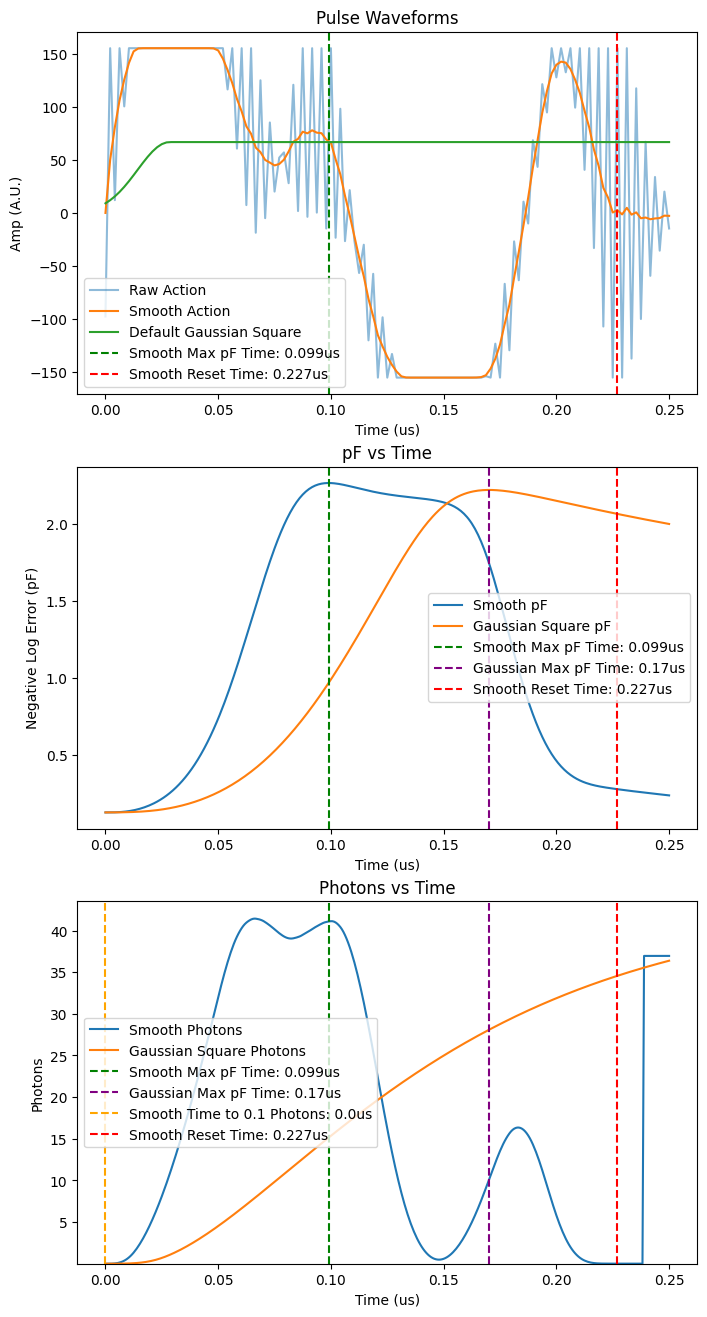

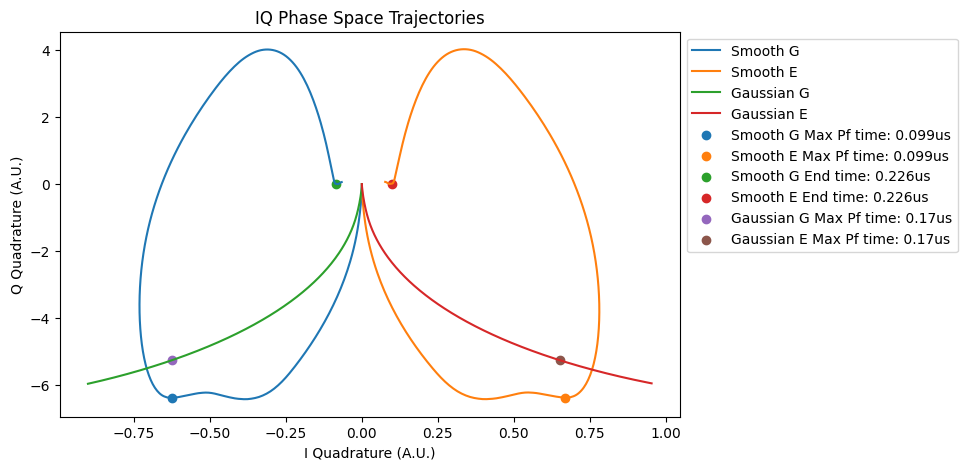

In [12]:
env.rollout_action(_rng, -mean_actions[-1])

In [4]:
single_train = jit(PPO_make_train(config), static_argnums=(-2, -1))

print(f"Starting a Run of {num_updates} Updates")
start = time.time()
single_result = single_train(
    _rng, 
    kappa,
    chi,
    kerr,
    time_coeff,
    snr_coeff,
    smoothness_coeff,
    n0,
    tau_0,
    res_amp_scaling,
    nR,
    snr_scale_factor,
    gamma_I,
    photon_gamma,
    num_t1,
    init_fid,
    photon_weight,
    # batchsize, 
    num_envs)
end = time.time()
print(f"time taken: {end - start}")

Starting a Run of 3000 Updates
global update: 100
reward: -191.77704931975686
max pF: 2.384938116772288
max photon: 24.65880297869444
photon time: 0.7428197447861723
smoothness: 0.005087343660085116
global update: 200
reward: -151.02544544909045
max pF: 2.560616818579245
max photon: 41.13502574712038
photon time: 0.8187370920671759
smoothness: 0.004074422136902968
global update: 300
reward: -116.43323310158956
max pF: 2.5609737962994705
max photon: 40.25551715493202
photon time: 0.8063498028204753
smoothness: 0.003291552399329601
global update: 400
reward: -77.57532008474683
max pF: 2.5628982642204834
max photon: 39.89603418111801
photon time: 0.7655321109183897
smoothness: 0.0024104002959961356
global update: 500
reward: -45.02314035723498
max pF: 2.562996016521817
max photon: 40.41325229406357
photon time: 0.7308153259004999
smoothness: 0.001653353209123773
global update: 600
reward: -25.971473368158975
max pF: 2.5637527180491846
max photon: 40.337393552064896
photon time: 0.67275766

In [9]:
# Extracting Results

metrics = single_result["metrics"]

rewards = metrics["reward"]
max_pFs = metrics["max pF"]
max_photons = metrics["max photon"]
photon_times = metrics["photon time"]
smoothnesses = metrics["smoothness"]
actions = metrics["action"]

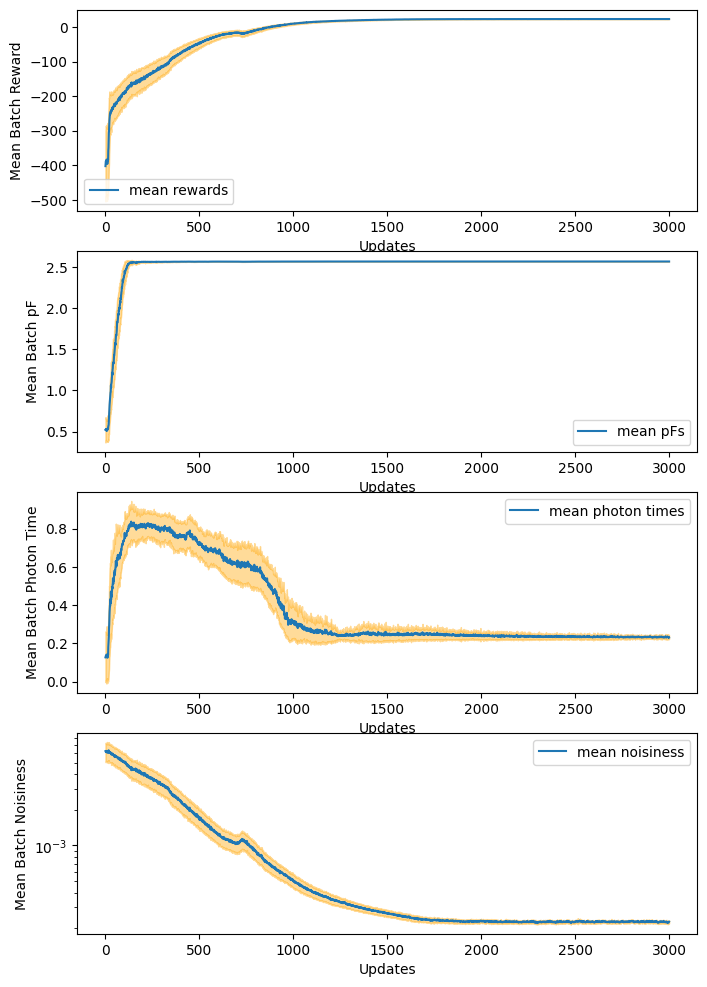

In [10]:
mean_rewards = jnp.mean(rewards, axis=-1)
std_rewards = jnp.std(rewards, axis=-1)

mean_pFs = jnp.mean(max_pFs, axis=-1)
std_pFs = jnp.std(max_pFs, axis=-1)

mean_times = jnp.mean(photon_times, axis=-1)
std_times = jnp.std(photon_times, axis=-1)

mean_smoothnesses = jnp.mean(smoothnesses, axis=-1)
std_smoothnesses = jnp.std(smoothnesses, axis=-1)

fig, ax = plt.subplots(4, figsize=(8.0, 12.0))

ax[0].plot(mean_rewards, label='mean rewards')
ax[0].fill_between(jnp.arange(num_updates), mean_rewards - std_rewards, mean_rewards + std_rewards, color='orange', alpha=0.4)
ax[0].set_xlabel('Updates')
ax[0].set_ylabel('Mean Batch Reward')
ax[0].legend()

ax[1].plot(mean_pFs, label='mean pFs')
ax[1].fill_between(jnp.arange(num_updates), mean_pFs - std_pFs, mean_pFs + std_pFs, color='orange', alpha=0.4)
ax[1].set_xlabel('Updates')
ax[1].set_ylabel('Mean Batch pF')
ax[1].legend()

ax[2].plot(mean_times, label='mean photon times')
ax[2].fill_between(jnp.arange(num_updates), mean_times - std_times, mean_times + std_times, color='orange', alpha=0.4)
ax[2].set_xlabel('Updates')
ax[2].set_ylabel('Mean Batch Photon Time')
ax[2].legend()

ax[3].plot(mean_smoothnesses, label='mean noisiness')
ax[3].fill_between(jnp.arange(num_updates), mean_smoothnesses - std_smoothnesses, mean_smoothnesses + std_smoothnesses, color='orange', alpha=0.4)
ax[3].set_xlabel('Updates')
ax[3].set_ylabel('Mean Batch Noisiness')
ax[3].set_yscale('log')
ax[3].legend()

plt.show()

In [11]:
### Plotting Final PPO Action ###

mean_actions = jnp.mean(actions, axis=1)

In [5]:
env = SinglePhotonLangevinReadoutEnv(
    kappa=kappa,
    chi=chi,
    kerr=kerr,
    time_coeff=time_coeff,
    snr_coeff=snr_coeff,
    smoothness_coeff=smoothness_coeff,
    n0=n0,
    tau_0=tau_0,
    res_amp_scaling=res_amp_scaling,
    nR=nR,
    snr_scale_factor=snr_scale_factor,
    gamma_I=gamma_I,
    photon_gamma=photon_gamma,
    num_t1=num_t1,
    init_fid=init_fid,
    photon_weight=photon_weight,
)

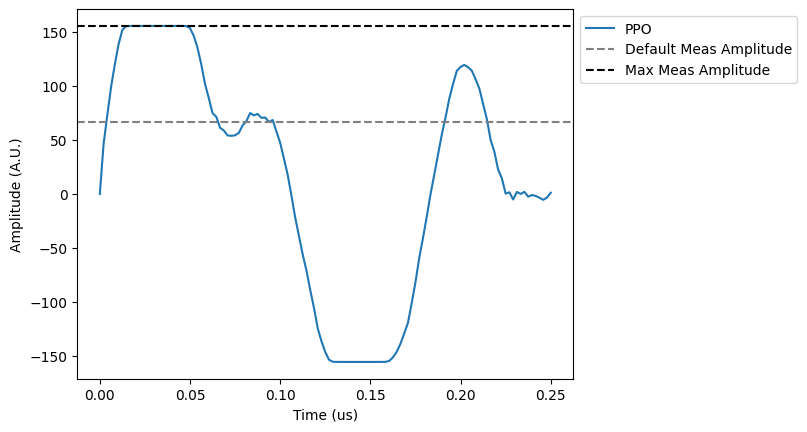

In [14]:
smooth_action_ppo = env.prepare_action(-mean_actions[-1])

plt.plot(env.ts_action, smooth_action_ppo, label='PPO')
plt.axhline(y=env.a0, label='Default Meas Amplitude', linestyle='dashed', color='grey')
plt.axhline(y=env.a0 * env.mu, label='Max Meas Amplitude', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (A.U.)')
plt.show()

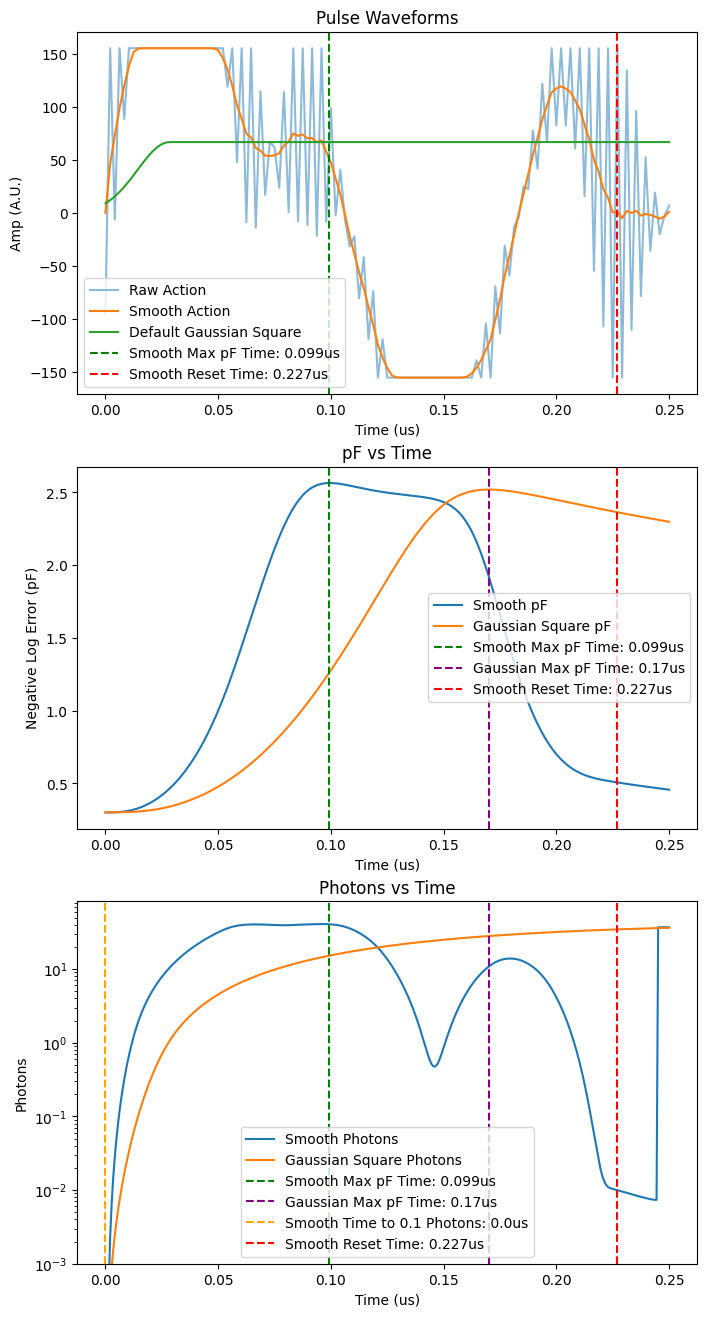

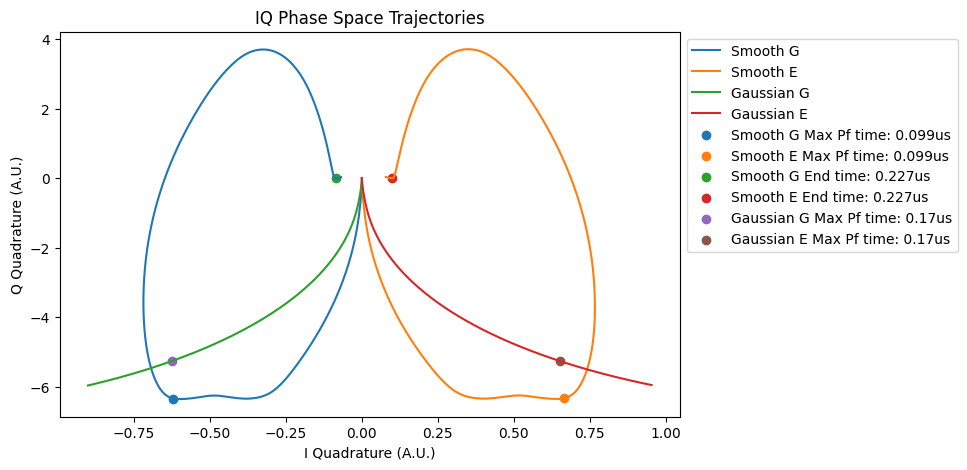

In [23]:
env.rollout_action(-mean_actions[-1], photon_log_scale=True)

# Evolutionary Strategies

In [15]:
# Instantiate the search strategy

cma_strategy = CMA_ES(popsize=num_envs, num_dims=env.num_actions, elite_ratio=0.6)
cma_params = cma_strategy.default_params.replace(
    init_min=-1, 
    init_max=1,
    clip_min=-env.mu,
    clip_max=env.mu)
cma_params

EvoParams(mu_eff=Array(64.36005323, dtype=float64), c_1=Array(0.00013314, dtype=float64), c_mu=Array(0.0082109, dtype=float64), c_sigma=Array(0.34860283, dtype=float64), d_sigma=Array(1.34860283, dtype=float64), c_c=Array(0.03594927, dtype=float64), chi_n=Array(10.9773085, dtype=float64, weak_type=True), c_m=1.0, sigma_init=1.0, init_min=-1, init_max=1, clip_min=-2.3255813953488373, clip_max=2.3255813953488373)

In [6]:
# Simulated Annealing

sim_anneal = SimAnneal(popsize=num_envs, num_dims=env.num_actions)
sim_params = sim_anneal.default_params
sim_params = sim_params.replace(
    init_min=-1, 
    init_max=1,
    clip_min=-env.mu,
    clip_max=env.mu,)

In [17]:
# Differential Evolution

de_strategy = DE(popsize=num_envs, num_dims=env.num_actions)
de_params = de_strategy.default_params.replace(
    init_min=-1, 
    init_max=1,
    clip_min=-env.mu,
    clip_max=env.mu)
de_params

EvoParams(mutate_best_vector=True, num_diff_vectors=1, cross_over_rate=0.9, diff_w=0.8, init_min=-1, init_max=1, clip_min=-2.3255813953488373, clip_max=2.3255813953488373)

In [10]:
def single_rollout(action):
    smooth_drive = env.prepare_action(action)

    single_res = env.calc_results(smooth_drive)
    reward, _state = env.calc_reward_and_state(
        _rng, single_res.astype(env.float_dtype), smooth_drive, action * env.a0
    )

    fitness = -reward # Since we are dealing with minimisation

    return fitness.astype(jnp.float32), _state

vmap_rollout = jax.jit(jax.vmap(single_rollout))

## Simulated Annealing
Running for 10k Steps, this is the most successful algo so far

In [11]:
rng = jax.random.PRNGKey(seed)

sim_name = 'SIM_ANNEAL'

# Make the Jax Random Seed in the Training Cell
# To ensure same seed is used for all runs
rng = jax.random.PRNGKey(seed=seed)
rng, _rng = jax.random.split(rng)

sim_state = sim_anneal.initialize(_rng, sim_params)

start = time.time()

# For Logging
print_rate = 100 # For monitoring the learning
total_train_gens = 5_000

def_reward = 100.
sim_fitness_arr = np.zeros(total_train_gens) - def_reward
sim_rewards_arr = np.zeros((total_train_gens, num_envs))
sim_smoothness_arr = np.zeros((total_train_gens, num_envs))
sim_photon_time_arr = np.zeros((total_train_gens, num_envs))
sim_pF_arr = np.zeros((total_train_gens, num_envs))
sim_actions_arr = np.zeros((total_train_gens, env.num_actions))

# Run ask-eval-tell loop - NOTE: By default minimization
for t in range(total_train_gens):
    rng, rng_gen = jax.random.split(rng, 2)
    x, sim_state = sim_anneal.ask(rng_gen, sim_state, sim_params) # Sampling actions from strategy
    fitness, env_state = vmap_rollout(x) # Function we defined
    sim_state = sim_anneal.tell(x, fitness, sim_state, sim_params) # Updating strategy with fitnesses

    # Logging
    sim_fitness_arr[t] = jnp.mean(fitness)
    sim_actions_arr[t] = jnp.mean(x, axis=0)

    sim_rewards_arr[t] = env_state[:,0]
    sim_pF_arr[t] = env_state[:,1]
    sim_photon_time_arr[t] = env_state[:,3]
    sim_smoothness_arr[t] = env_state[:,4]

    if (t + 1) % print_rate == 0:
        print(f"{sim_name} - # Gen: {t + 1}|Fitness: {sim_state.best_fitness}")
        print(f"Reward: {jnp.round(jnp.mean(sim_rewards_arr[t]), 2)} ± {jnp.round(jnp.std(sim_rewards_arr[t]), 2)}")
        print(f"pF: {jnp.round(jnp.mean(sim_pF_arr[t]), 3)} ± {jnp.round(jnp.std(sim_pF_arr[t]), 3)}")
        print(f"Photon Time: {jnp.round(jnp.mean(sim_photon_time_arr[t]), 4)} ± {jnp.round(jnp.std(sim_photon_time_arr[t]), 4)}")
        print(f"Smoothness: {jnp.round(jnp.mean(sim_smoothness_arr[t]), 6)} ± {jnp.round(jnp.std(sim_smoothness_arr[t]), 6)}")
        print(f"Time: {time.time() - start}")

SIM_ANNEAL - # Gen: 100|Fitness: 334121.03125
Reward: -386002.97000000003 ± 18597.68
pF: 0.34400000000000003 ± 0.005
Photon Time: 0.0516 ± 0.009600000000000001
Smoothness: 9.154004 ± 0.441418
Time: 31.71120285987854
SIM_ANNEAL - # Gen: 200|Fitness: 151090.421875
Reward: -221145.08000000002 ± 18753.93
pF: 0.34700000000000003 ± 0.006
Photon Time: 0.0779 ± 0.0342
Smoothness: 5.24107 ± 0.44512799999999997
Time: 39.843072175979614
SIM_ANNEAL - # Gen: 300|Fitness: 134498.359375
Reward: -213606.05000000002 ± 17414.52
pF: 0.451 ± 0.007
Photon Time: 0.091 ± 0.0194
Smoothness: 5.062162 ± 0.41333699999999995
Time: 46.86345887184143
SIM_ANNEAL - # Gen: 400|Fitness: 125107.90625
Reward: -188162.14 ± 18382.82
pF: 0.537 ± 0.008
Photon Time: 0.08270000000000001 ± 0.0207
Smoothness: 4.4582559999999996 ± 0.436318
Time: 54.07693815231323
SIM_ANNEAL - # Gen: 500|Fitness: 121044.7578125
Reward: -210234.42 ± 19367.27
pF: 0.522 ± 0.007
Photon Time: 0.0999 ± 0.0212
Smoothness: 4.982123 ± 0.45968699999999996
T

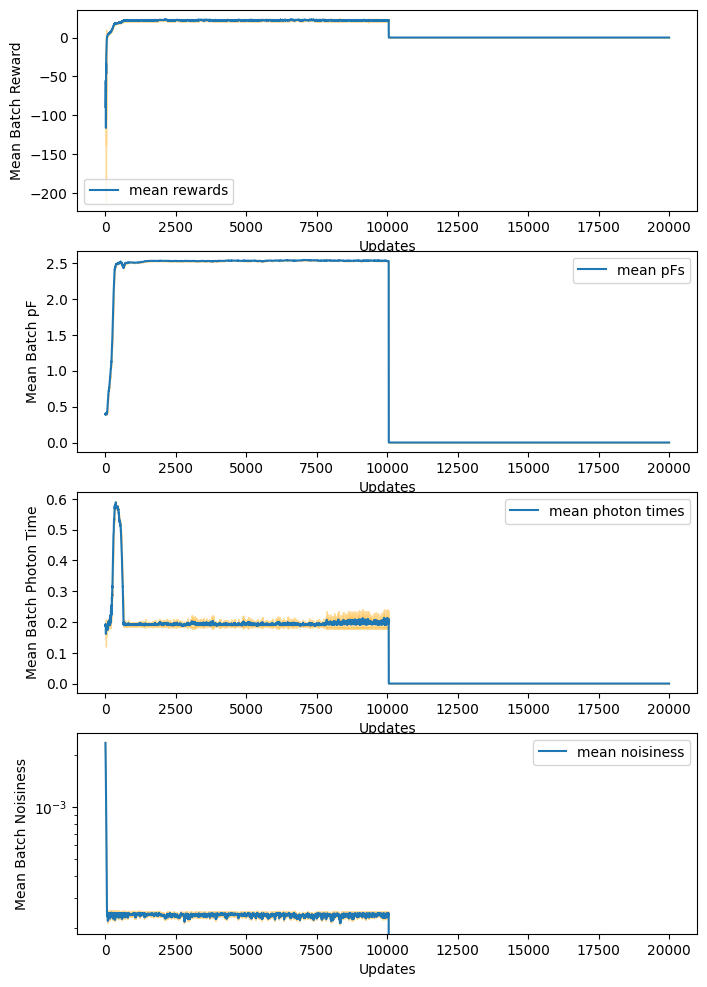

In [20]:
mean_rewards_sim = jnp.mean(sim_rewards_arr, axis=-1)
std_rewards_sim = jnp.std(sim_rewards_arr, axis=-1)

mean_pFs_sim = jnp.mean(sim_pF_arr, axis=-1)
std_pFs_sim = jnp.std(sim_pF_arr, axis=-1)

mean_times_sim = jnp.mean(sim_photon_time_arr, axis=-1)
std_times_sim = jnp.std(sim_photon_time_arr, axis=-1)

mean_smoothnesses_sim = jnp.mean(sim_smoothness_arr, axis=-1)
std_smoothnesses_sim = jnp.std(sim_smoothness_arr, axis=-1)

fig, ax = plt.subplots(4, figsize=(8.0, 12.0))

ax[0].plot(mean_rewards_sim, label='mean rewards')
ax[0].fill_between(jnp.arange(total_train_gens), mean_rewards_sim - std_rewards_sim, mean_rewards_sim + std_rewards_sim, color='orange', alpha=0.4)
ax[0].set_xlabel('Updates')
ax[0].set_ylabel('Mean Batch Reward')
ax[0].legend()

ax[1].plot(mean_pFs_sim, label='mean pFs')
ax[1].fill_between(jnp.arange(total_train_gens), mean_pFs_sim - std_pFs_sim, mean_pFs_sim + std_pFs_sim, color='orange', alpha=0.4)
ax[1].set_xlabel('Updates')
ax[1].set_ylabel('Mean Batch pF')
ax[1].legend()

ax[2].plot(mean_times_sim, label='mean photon times')
ax[2].fill_between(jnp.arange(total_train_gens), mean_times_sim - std_times_sim, mean_times_sim + std_times_sim, color='orange', alpha=0.4)
ax[2].set_xlabel('Updates')
ax[2].set_ylabel('Mean Batch Photon Time')
ax[2].legend()

ax[3].plot(mean_smoothnesses_sim, label='mean noisiness')
ax[3].fill_between(jnp.arange(total_train_gens), mean_smoothnesses_sim - std_smoothnesses_sim, mean_smoothnesses_sim + std_smoothnesses_sim, color='orange', alpha=0.4)
ax[3].set_xlabel('Updates')
ax[3].set_ylabel('Mean Batch Noisiness')
ax[3].set_yscale('log')
ax[3].legend()

plt.show()

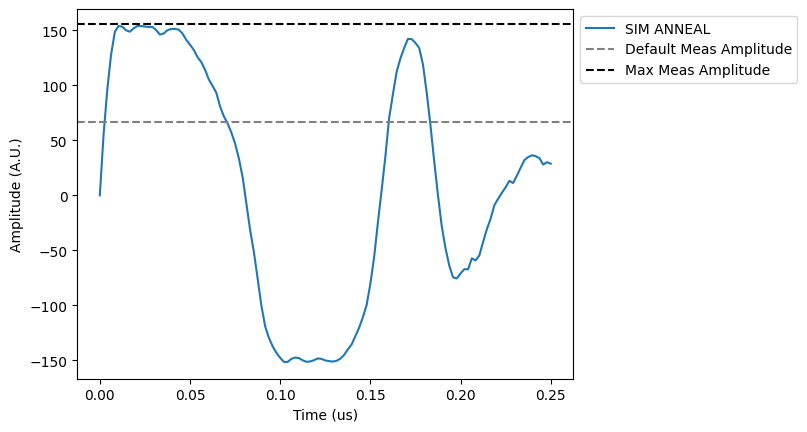

In [21]:
smooth_action_sim = env.prepare_action(sim_state.best_member)

plt.plot(env.ts_action, smooth_action_sim, label='SIM ANNEAL')
plt.axhline(y=env.a0, label='Default Meas Amplitude', linestyle='dashed', color='grey')
plt.axhline(y=env.a0 * env.mu, label='Max Meas Amplitude', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (A.U.)')
plt.show()

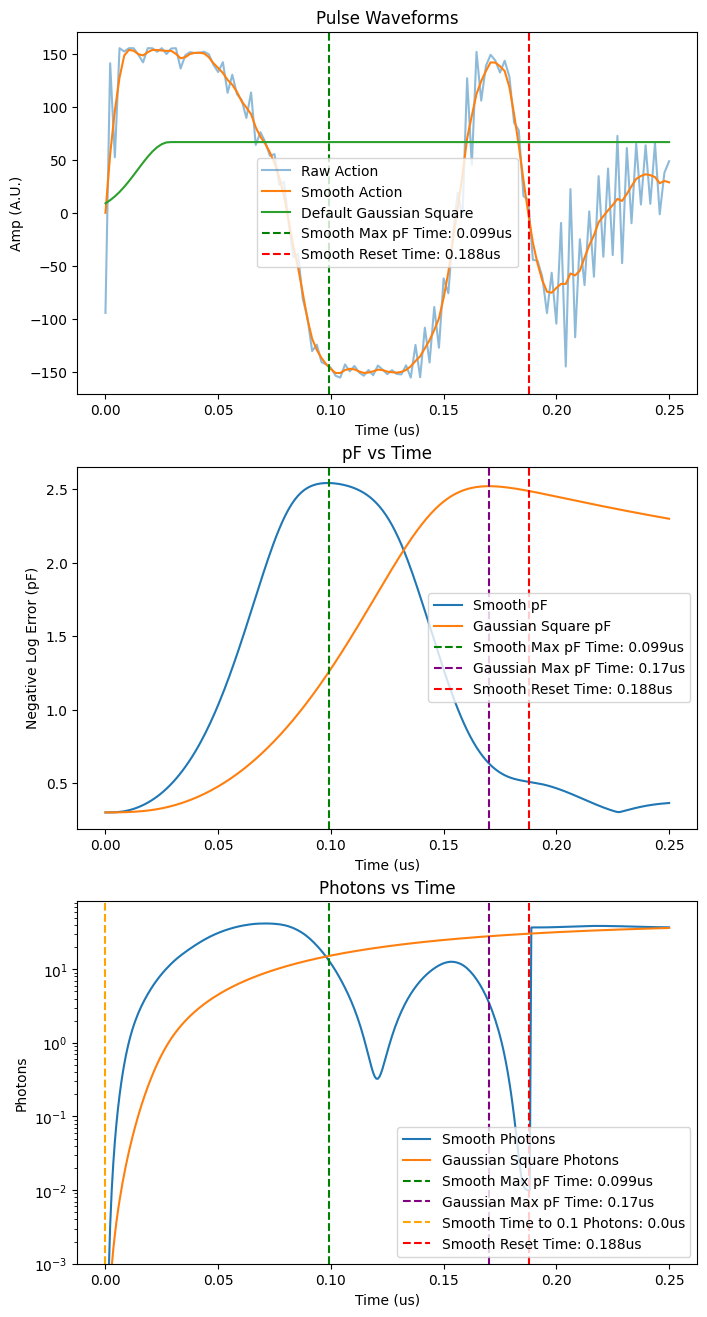

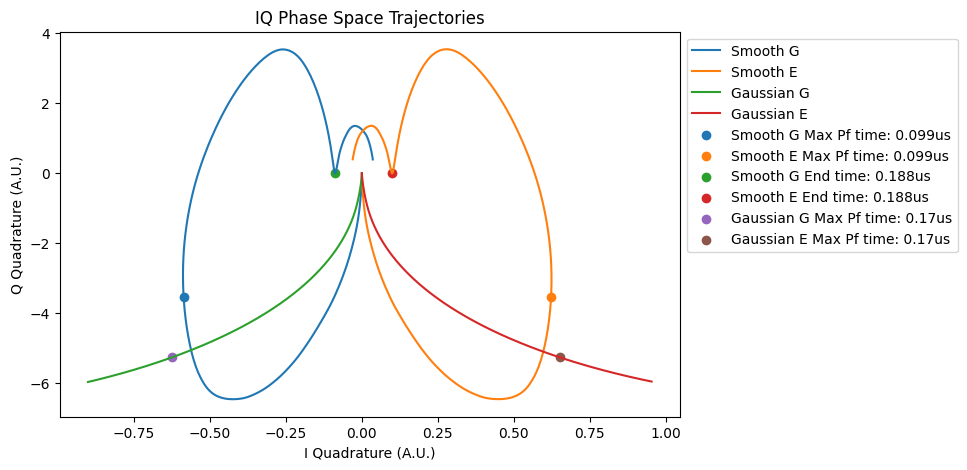

In [25]:
env.rollout_action(sim_state.best_member, photon_log_scale=True)

## CMA-ES
I reduce the Total Training Generations for CMA-ES to 5000 because I find that Convergent Learning is not actually achieved with CMA-ES regardless of Training Duration, however some exploration is achieved. In other words CMA-ES can find an optimal member (optimal action), but its 'policy' doesn't converge to this member.

In [26]:
rng = jax.random.PRNGKey(seed)

cma_name = 'CMA_ES'

# Make the Jax Random Seed in the Training Cell
# To ensure same seed is used for all runs
rng = jax.random.PRNGKey(seed=seed)
rng, _rng = jax.random.split(rng)

cma_state = cma_strategy.initialize(_rng, cma_params)

start = time.time()

# For Logging
print_rate = 100 # For monitoring the learning
total_train_gens_cma = 5_000

def_reward = 100.
cma_fitness_arr = np.zeros(total_train_gens_cma) - def_reward
cma_rewards_arr = np.zeros((total_train_gens_cma, num_envs))
cma_smoothness_arr = np.zeros((total_train_gens_cma, num_envs))
cma_photon_time_arr = np.zeros((total_train_gens_cma, num_envs))
cma_pF_arr = np.zeros((total_train_gens_cma, num_envs))
cma_actions_arr = np.zeros((total_train_gens_cma, env.num_actions))

# Run ask-eval-tell loop - NOTE: By default minimization
for t in range(total_train_gens_cma):
    rng, rng_gen = jax.random.split(rng, 2)
    x, cma_state = cma_strategy.ask(rng_gen, cma_state, cma_params) # Sampling actions from strategy
    fitness, env_state = vmap_rollout(x) # Function we defined
    cma_state = cma_strategy.tell(x, fitness, cma_state, cma_params) # Updating strategy with fitnesses

    # Logging
    cma_fitness_arr[t] = jnp.mean(fitness)
    cma_actions_arr[t] = jnp.mean(x, axis=0)

    cma_rewards_arr[t] = env_state[:,0]
    cma_pF_arr[t] = env_state[:,1]
    cma_photon_time_arr[t] = env_state[:,3]
    cma_smoothness_arr[t] = env_state[:,4]

    if (t + 1) % print_rate == 0:
        print(f"{cma_name} - # Gen: {t + 1}|Fitness: {cma_state.best_fitness}")
        print(f"Reward: {jnp.round(jnp.mean(cma_rewards_arr[t]), 2)} ± {jnp.round(jnp.std(cma_rewards_arr[t]), 2)}")
        print(f"pF: {jnp.round(jnp.mean(cma_pF_arr[t]), 3)} ± {jnp.round(jnp.std(cma_pF_arr[t]), 3)}")
        print(f"Photon Time: {jnp.round(jnp.mean(cma_photon_time_arr[t]), 4)} ± {jnp.round(jnp.std(cma_photon_time_arr[t]), 4)}")
        print(f"Smoothness: {jnp.round(jnp.mean(cma_smoothness_arr[t]), 6)} ± {jnp.round(jnp.std(cma_smoothness_arr[t]), 6)}")
        print(f"Time: {time.time() - start}")

CMA_ES - # Gen: 100|Fitness: -18.471145629882812
Reward: 15.99 ± 1.55
pF: 2.521 ± 0.018000000000000002
Photon Time: 0.7007 ± 0.0329
Smoothness: 0.000268 ± 4.4e-05
Time: 17.559793949127197
CMA_ES - # Gen: 200|Fitness: -22.948997497558594
Reward: 21.39 ± 0.99
pF: 2.555 ± 0.004
Photon Time: 0.2998 ± 0.048600000000000004
Smoothness: 0.000202 ± 2.9999999999999997e-05
Time: 26.549088716506958
CMA_ES - # Gen: 300|Fitness: -23.13020896911621
Reward: 22.43 ± 0.63
pF: 2.564 ± 0.001
Photon Time: 0.2585 ± 0.0111
Smoothness: 0.000173 ± 1.6e-05
Time: 42.704909801483154
CMA_ES - # Gen: 400|Fitness: -23.148529052734375
Reward: 22.56 ± 0.73
pF: 2.565 ± 0.0
Photon Time: 0.25370000000000004 ± 0.0049
Smoothness: 0.000202 ± 1.3e-05
Time: 53.08091068267822
CMA_ES - # Gen: 500|Fitness: -23.157894134521484
Reward: 22.740000000000002 ± 0.74
pF: 2.566 ± 0.0
Photon Time: 0.25070000000000003 ± 0.001
Smoothness: 0.000206 ± 7e-06
Time: 62.67142200469971
CMA_ES - # Gen: 600|Fitness: -23.168407440185547
Reward: 23.07

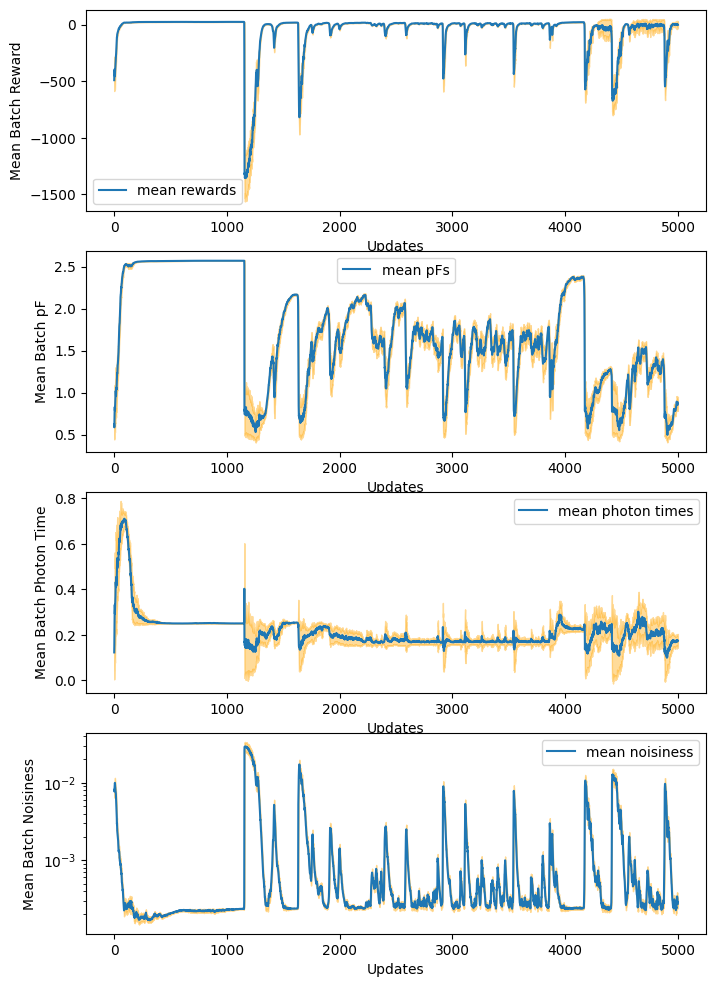

In [27]:
mean_rewards_cma = jnp.mean(cma_rewards_arr, axis=-1)
std_rewards_cma = jnp.std(cma_rewards_arr, axis=-1)

mean_pFs_cma = jnp.mean(cma_pF_arr, axis=-1)
std_pFs_cma = jnp.std(cma_pF_arr, axis=-1)

mean_times_cma = jnp.mean(cma_photon_time_arr, axis=-1)
std_times_cma = jnp.std(cma_photon_time_arr, axis=-1)

mean_smoothnesses_cma = jnp.mean(cma_smoothness_arr, axis=-1)
std_smoothnesses_cma = jnp.std(cma_smoothness_arr, axis=-1)

fig, ax = plt.subplots(4, figsize=(8.0, 12.0))

ax[0].plot(mean_rewards_cma, label='mean rewards')
ax[0].fill_between(jnp.arange(total_train_gens_cma), mean_rewards_cma - std_rewards_cma, mean_rewards_cma + std_rewards_cma, color='orange', alpha=0.4)
ax[0].set_xlabel('Updates')
ax[0].set_ylabel('Mean Batch Reward')
ax[0].legend()

ax[1].plot(mean_pFs_cma, label='mean pFs')
ax[1].fill_between(jnp.arange(total_train_gens_cma), mean_pFs_cma - std_pFs_cma, mean_pFs_cma + std_pFs_cma, color='orange', alpha=0.4)
ax[1].set_xlabel('Updates')
ax[1].set_ylabel('Mean Batch pF')
ax[1].legend()

ax[2].plot(mean_times_cma, label='mean photon times')
ax[2].fill_between(jnp.arange(total_train_gens_cma), mean_times_cma - std_times_cma, mean_times_cma + std_times_cma, color='orange', alpha=0.4)
ax[2].set_xlabel('Updates')
ax[2].set_ylabel('Mean Batch Photon Time')
ax[2].legend()

ax[3].plot(mean_smoothnesses_cma, label='mean noisiness')
ax[3].fill_between(jnp.arange(total_train_gens_cma), mean_smoothnesses_cma - std_smoothnesses_cma, mean_smoothnesses_cma + std_smoothnesses_cma, color='orange', alpha=0.4)
ax[3].set_xlabel('Updates')
ax[3].set_ylabel('Mean Batch Noisiness')
ax[3].set_yscale('log')
ax[3].legend()

plt.show()

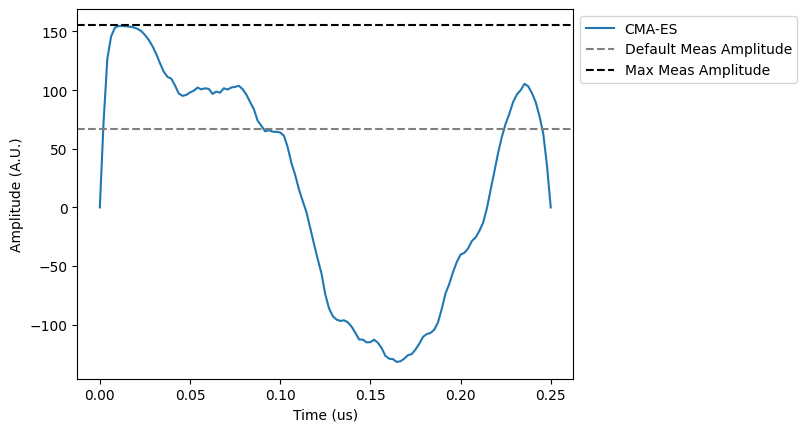

In [28]:
smooth_action_cma = env.prepare_action(cma_state.best_member)

plt.plot(env.ts_action, smooth_action_cma, label='CMA-ES')
plt.axhline(y=env.a0, label='Default Meas Amplitude', linestyle='dashed', color='grey')
plt.axhline(y=env.a0 * env.mu, label='Max Meas Amplitude', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (A.U.)')
plt.show()

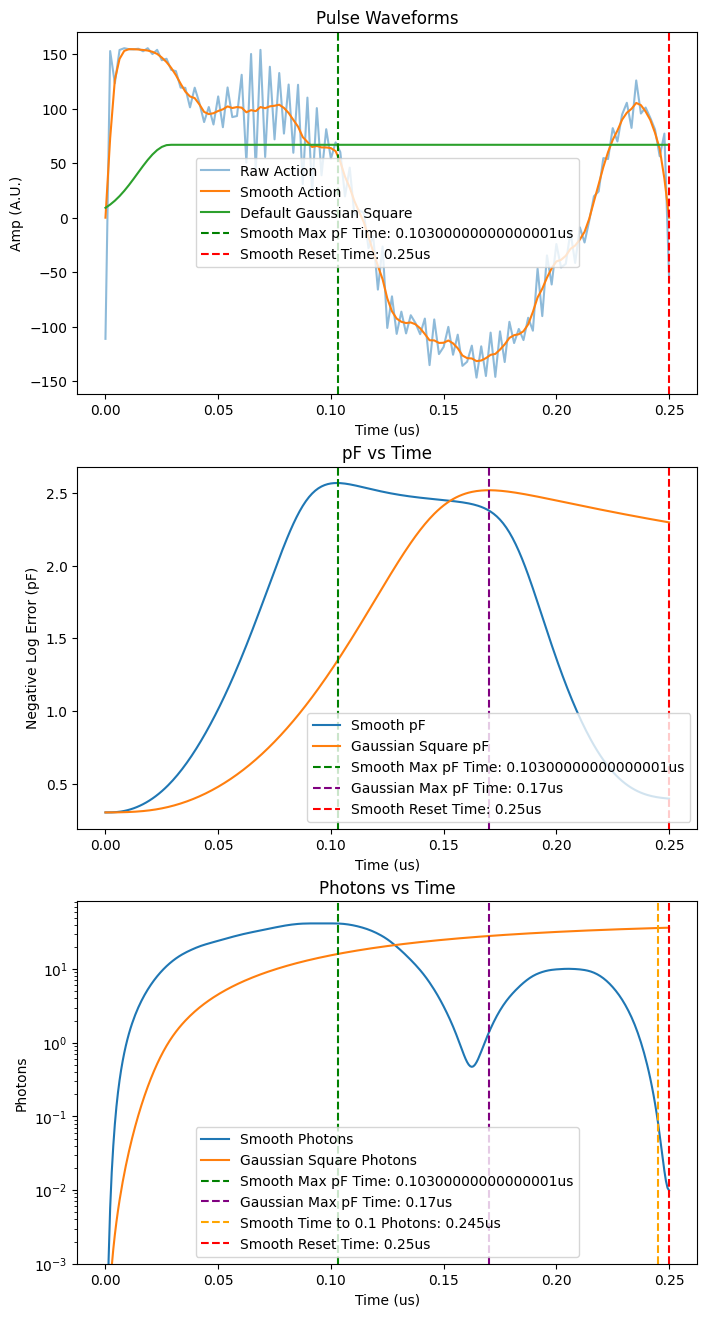

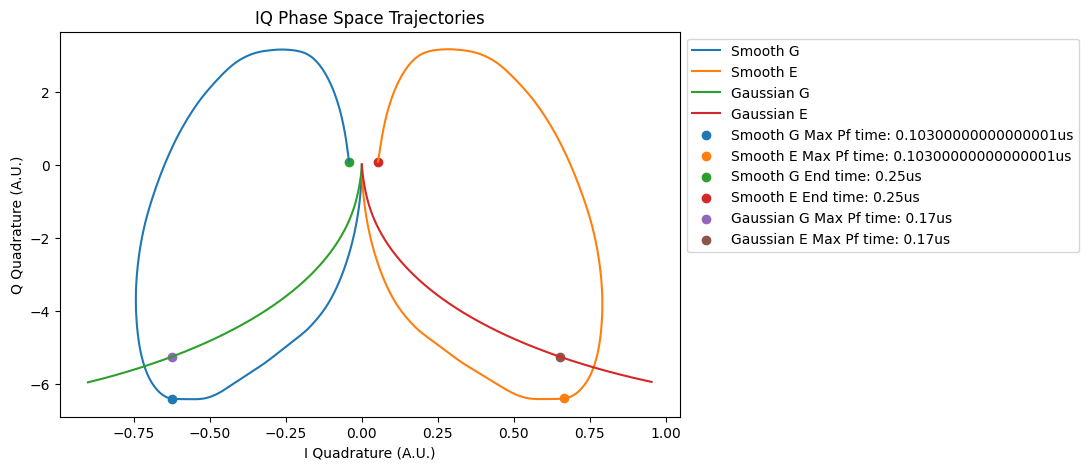

In [29]:
env.rollout_action(cma_state.best_member, photon_log_scale=True)

## Differential Evolution
I actually also tested out Particle Swarm Optimisation, however it did not learn at all. Differential Evolution on the other hand takes much longer for learning, but it gets there!

However, Differential Evolution is much slower than Simulated Annealing, so I only run it for 10k Steps, though you can test out for 20k for the figure as well.

In [30]:
### Differential Evolution ###

rng = jax.random.PRNGKey(seed)

de_name = 'DIFFERENTIAL_EVOLUTION'

# Make the Jax Random Seed in the Training Cell
# To ensure same seed is used for all runs
rng = jax.random.PRNGKey(seed=seed)
rng, _rng = jax.random.split(rng)

de_state = de_strategy.initialize(_rng, de_params)

start = time.time()

# For Logging
print_rate = 100 # For monitoring the learning
total_train_gens_de = 10_000

def_reward = 100.
de_fitness_arr = np.zeros(total_train_gens_de) - def_reward
de_rewards_arr = np.zeros((total_train_gens_de, num_envs))
de_smoothness_arr = np.zeros((total_train_gens_de, num_envs))
de_photon_time_arr = np.zeros((total_train_gens_de, num_envs))
de_pF_arr = np.zeros((total_train_gens_de, num_envs))
de_actions_arr = np.zeros((total_train_gens_de, env.num_actions))

# Run ask-eval-tell loop - NOTE: By default minimization
for t in range(total_train_gens_de):
    rng, rng_gen = jax.random.split(rng, 2)
    x, de_state = de_strategy.ask(rng_gen, de_state, de_params) # Sampling actions from strategy
    fitness, env_state = vmap_rollout(x) # Function we defined
    de_state = de_strategy.tell(x, fitness, de_state, de_params) # Updating strategy with fitnesses

    # Logging
    de_fitness_arr[t] = jnp.mean(fitness)
    de_actions_arr[t] = jnp.mean(x, axis=0)

    de_rewards_arr[t] = env_state[:,0]
    de_pF_arr[t] = env_state[:,1]
    de_photon_time_arr[t] = env_state[:,3]
    de_smoothness_arr[t] = env_state[:,4]

    if (t + 1) % print_rate == 0:
        print(f"{de_name} - # Gen: {t + 1}|Fitness: {de_state.best_fitness}")
        print(f"Reward: {jnp.round(jnp.mean(de_rewards_arr[t]), 2)} ± {jnp.round(jnp.std(de_rewards_arr[t]), 2)}")
        print(f"pF: {jnp.round(jnp.mean(de_pF_arr[t]), 3)} ± {jnp.round(jnp.std(de_pF_arr[t]), 3)}")
        print(f"Photon Time: {jnp.round(jnp.mean(de_photon_time_arr[t]), 4)} ± {jnp.round(jnp.std(de_photon_time_arr[t]), 4)}")
        print(f"Smoothness: {jnp.round(jnp.mean(de_smoothness_arr[t]), 6)} ± {jnp.round(jnp.std(de_smoothness_arr[t]), 6)}")
        print(f"Time: {time.time() - start}")

DIFFERENTIAL_EVOLUTION - # Gen: 100|Fitness: 45.222068786621094
Reward: -222.04 ± 100.82000000000001
pF: 0.523 ± 0.14400000000000002
Photon Time: 0.16590000000000002 ± 0.07680000000000001
Smoothness: 0.004384 ± 0.001052
Time: 19.471154928207397
DIFFERENTIAL_EVOLUTION - # Gen: 200|Fitness: 25.78371810913086
Reward: -109.66 ± 81.66
pF: 0.562 ± 0.10300000000000001
Photon Time: 0.33640000000000003 ± 0.2154
Smoothness: 0.001958 ± 0.0005239999999999999
Time: 35.58056688308716
DIFFERENTIAL_EVOLUTION - # Gen: 300|Fitness: 7.522456645965576
Reward: -38.160000000000004 ± 23.96
pF: 0.511 ± 0.059000000000000004
Photon Time: 0.18560000000000001 ± 0.0738
Smoothness: 0.0011149999999999999 ± 0.00021999999999999998
Time: 44.96599292755127
DIFFERENTIAL_EVOLUTION - # Gen: 400|Fitness: -1.288475751876831
Reward: -14.71 ± 6.1000000000000005
pF: 0.504 ± 0.046
Photon Time: 0.19440000000000002 ± 0.0548
Smoothness: 0.000611 ± 0.000144
Time: 59.81265902519226
DIFFERENTIAL_EVOLUTION - # Gen: 500|Fitness: -2.6256

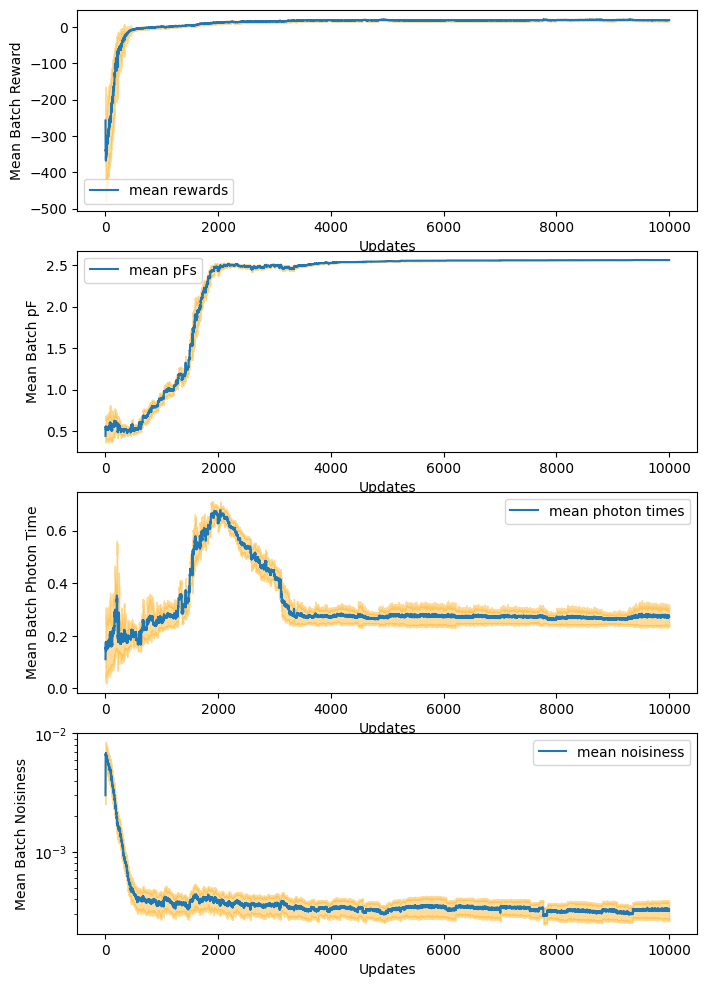

In [31]:
mean_rewards_de = jnp.mean(de_rewards_arr, axis=-1)
std_rewards_de = jnp.std(de_rewards_arr, axis=-1)

mean_pFs_de = jnp.mean(de_pF_arr, axis=-1)
std_pFs_de = jnp.std(de_pF_arr, axis=-1)

mean_times_de = jnp.mean(de_photon_time_arr, axis=-1)
std_times_de = jnp.std(de_photon_time_arr, axis=-1)

mean_smoothnesses_de = jnp.mean(de_smoothness_arr, axis=-1)
std_smoothnesses_de = jnp.std(de_smoothness_arr, axis=-1)

fig, ax = plt.subplots(4, figsize=(8.0, 12.0))

ax[0].plot(mean_rewards_de, label='mean rewards')
ax[0].fill_between(jnp.arange(total_train_gens_de), mean_rewards_de - std_rewards_de, mean_rewards_de + std_rewards_de, color='orange', alpha=0.4)
ax[0].set_xlabel('Updates')
ax[0].set_ylabel('Mean Batch Reward')
ax[0].legend()

ax[1].plot(mean_pFs_de, label='mean pFs')
ax[1].fill_between(jnp.arange(total_train_gens_de), mean_pFs_de - std_pFs_de, mean_pFs_de + std_pFs_de, color='orange', alpha=0.4)
ax[1].set_xlabel('Updates')
ax[1].set_ylabel('Mean Batch pF')
ax[1].legend()

ax[2].plot(mean_times_de, label='mean photon times')
ax[2].fill_between(jnp.arange(total_train_gens_de), mean_times_de - std_times_de, mean_times_de + std_times_de, color='orange', alpha=0.4)
ax[2].set_xlabel('Updates')
ax[2].set_ylabel('Mean Batch Photon Time')
ax[2].legend()

ax[3].plot(mean_smoothnesses_de, label='mean noisiness')
ax[3].fill_between(jnp.arange(total_train_gens_de), mean_smoothnesses_de - std_smoothnesses_de, mean_smoothnesses_de + std_smoothnesses_de, color='orange', alpha=0.4)
ax[3].set_xlabel('Updates')
ax[3].set_ylabel('Mean Batch Noisiness')
ax[3].set_yscale('log')
ax[3].legend()

plt.show()

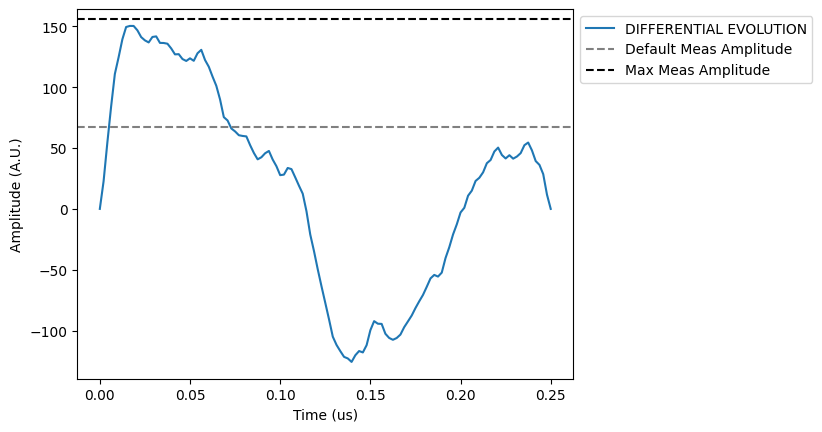

In [32]:
smooth_action_de = env.prepare_action(de_state.best_member)

plt.plot(env.ts_action, smooth_action_de, label='DIFFERENTIAL EVOLUTION')
plt.axhline(y=env.a0, label='Default Meas Amplitude', linestyle='dashed', color='grey')
plt.axhline(y=env.a0 * env.mu, label='Max Meas Amplitude', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (A.U.)')
plt.show()

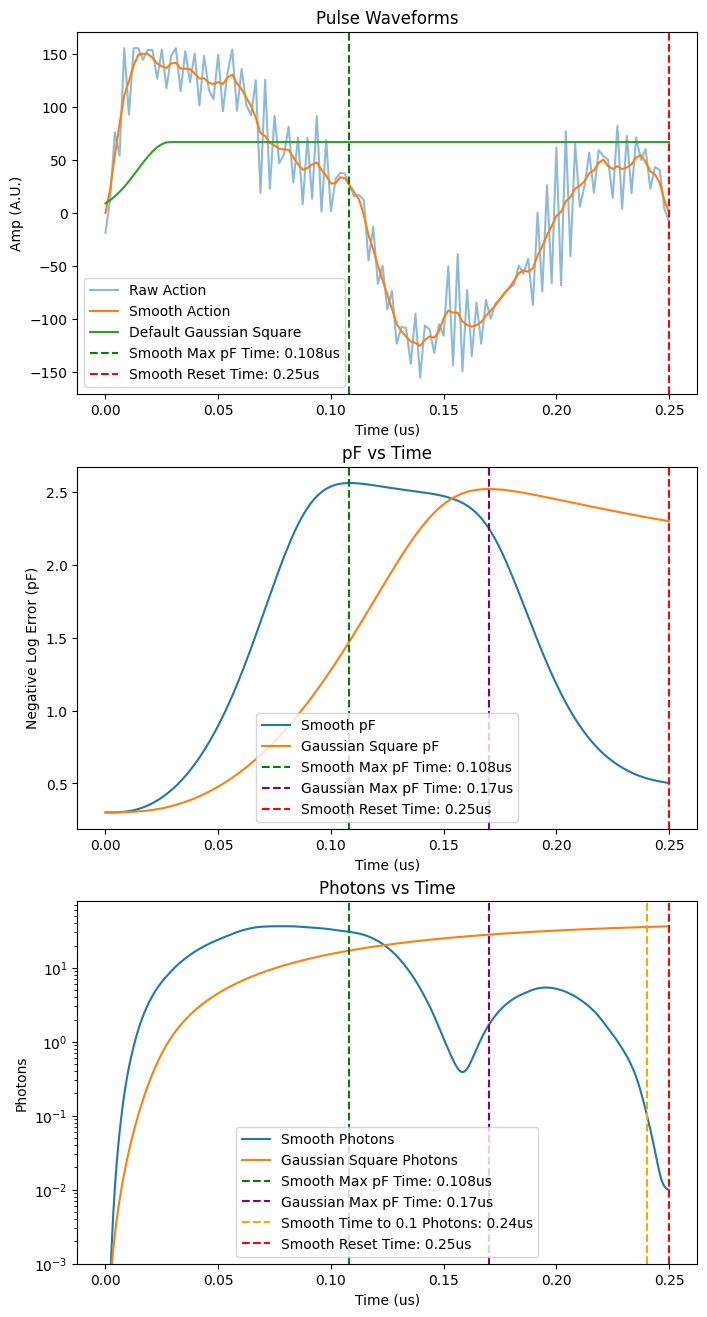

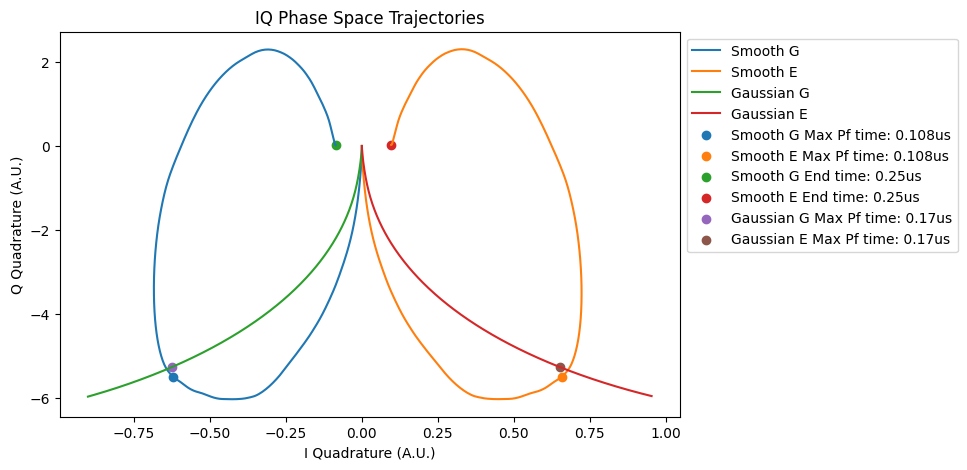

In [33]:
env.rollout_action(de_state.best_member, photon_log_scale=True)

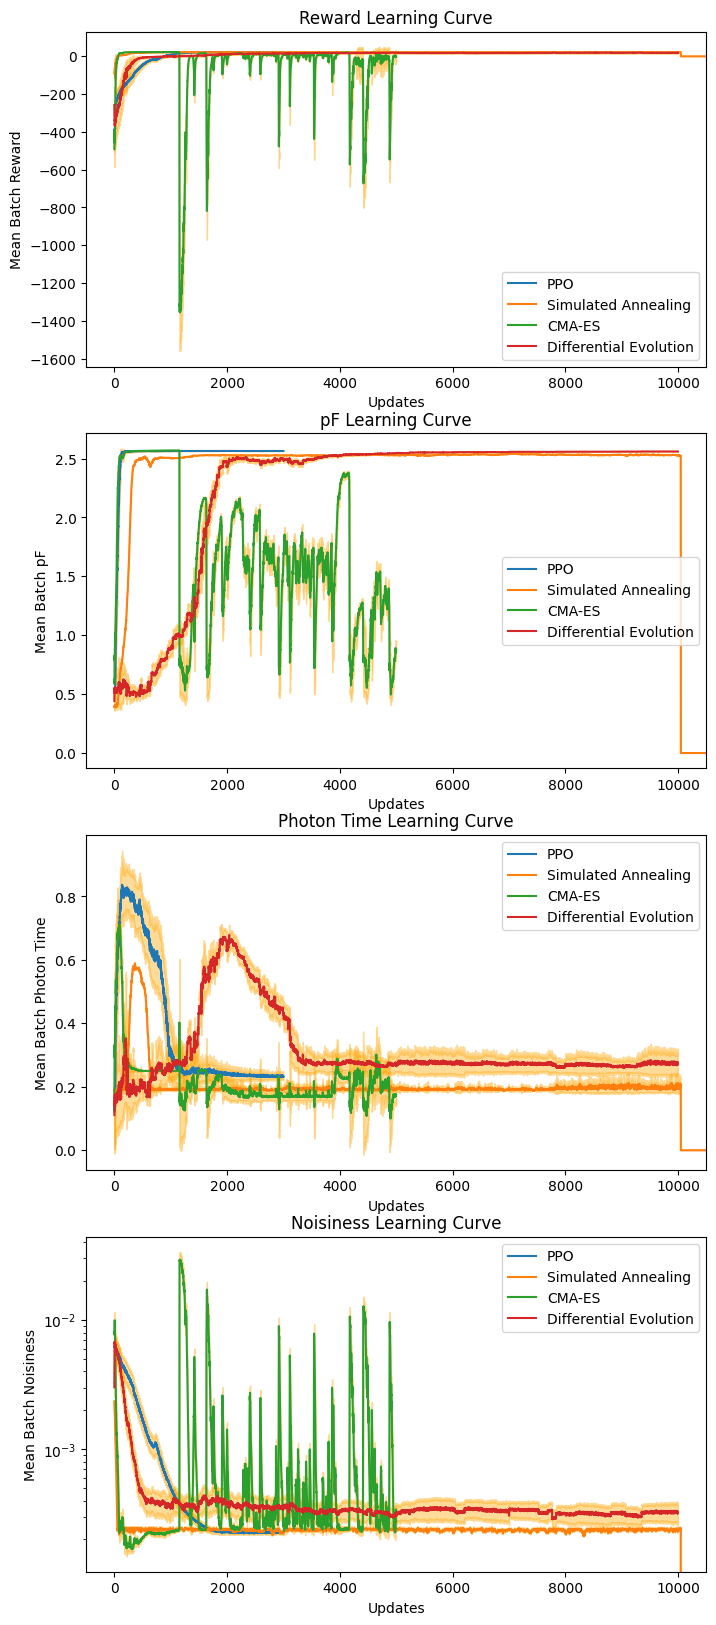

In [44]:
### Learning Curves Base Data ###

fig, ax = plt.subplots(4, figsize=(8.0, 20.0))

ax[0].plot(mean_rewards, label='PPO')
ax[0].fill_between(jnp.arange(num_updates), mean_rewards - std_rewards, mean_rewards + std_rewards, color='orange', alpha=0.4)
ax[0].plot(mean_rewards_sim, label='Simulated Annealing')
ax[0].fill_between(jnp.arange(len(mean_rewards_sim)), mean_rewards_sim - std_rewards_sim, mean_rewards_sim + std_rewards_sim, color='orange', alpha=0.4)
ax[0].plot(mean_rewards_cma, label='CMA-ES')
ax[0].fill_between(jnp.arange(len(mean_rewards_cma)), mean_rewards_cma - std_rewards_cma, mean_rewards_cma + std_rewards_cma, color='orange', alpha=0.4)
ax[0].plot(mean_rewards_de, label='Differential Evolution')
ax[0].fill_between(jnp.arange(len(mean_rewards_de)), mean_rewards_de - std_rewards_de, mean_rewards_de + std_rewards_de, color='orange', alpha=0.4)
ax[0].set_xlabel('Updates')
ax[0].set_ylabel('Mean Batch Reward')
ax[0].set_title('Reward Learning Curve')
ax[0].set_xlim(left=-500, right=10500)
ax[0].legend()

ax[1].plot(mean_pFs, label='PPO')
ax[1].fill_between(jnp.arange(num_updates), mean_pFs - std_pFs, mean_pFs + std_pFs, color='orange', alpha=0.4)
ax[1].plot(mean_pFs_sim, label='Simulated Annealing')
ax[1].fill_between(jnp.arange(len(mean_pFs_sim)), mean_pFs_sim - std_pFs_sim, mean_pFs_sim + std_pFs_sim, color='orange', alpha=0.4)
ax[1].plot(mean_pFs_cma, label='CMA-ES')
ax[1].fill_between(jnp.arange(len(mean_pFs_cma)), mean_pFs_cma - std_pFs_cma, mean_pFs_cma + std_pFs_cma, color='orange', alpha=0.4)
ax[1].plot(mean_pFs_de, label='Differential Evolution')
ax[1].fill_between(jnp.arange(len(mean_pFs_de)), mean_pFs_de - std_pFs_de, mean_pFs_de + std_pFs_de, color='orange', alpha=0.4)
ax[1].set_xlabel('Updates')
ax[1].set_ylabel('Mean Batch pF')
ax[1].set_title('pF Learning Curve')
ax[1].set_xlim(left=-500, right=10500)
ax[1].legend()

ax[2].plot(mean_times, label='PPO')
ax[2].fill_between(jnp.arange(num_updates), mean_times - std_times, mean_times + std_times, color='orange', alpha=0.4)
ax[2].plot(mean_times_sim, label='Simulated Annealing')
ax[2].fill_between(jnp.arange(len(mean_times_sim)), mean_times_sim - std_times_sim, mean_times_sim + std_times_sim, color='orange', alpha=0.4)
ax[2].plot(mean_times_cma, label='CMA-ES')
ax[2].fill_between(jnp.arange(len(mean_times_cma)), mean_times_cma - std_times_cma, mean_times_cma + std_times_cma, color='orange', alpha=0.4)
ax[2].plot(mean_times_de, label='Differential Evolution')
ax[2].fill_between(jnp.arange(len(mean_times_de)), mean_times_de - std_times_de, mean_times_de + std_times_de, color='orange', alpha=0.4)
ax[2].set_xlabel('Updates')
ax[2].set_ylabel('Mean Batch Photon Time')
ax[2].set_title('Photon Time Learning Curve')
ax[2].set_xlim(left=-500, right=10500)
ax[2].legend()

ax[3].plot(mean_smoothnesses, label='PPO')
ax[3].fill_between(jnp.arange(num_updates), mean_smoothnesses - std_smoothnesses, mean_smoothnesses + std_smoothnesses, color='orange', alpha=0.4)
ax[3].plot(mean_smoothnesses_sim, label='Simulated Annealing')
ax[3].fill_between(jnp.arange(len(mean_smoothnesses_sim)), mean_smoothnesses_sim - std_smoothnesses_sim, mean_smoothnesses_sim + std_smoothnesses_sim, color='orange', alpha=0.4)
ax[3].plot(mean_smoothnesses_cma, label='CMA-ES')
ax[3].fill_between(jnp.arange(len(mean_smoothnesses_cma)), mean_smoothnesses_cma - std_smoothnesses_cma, mean_smoothnesses_cma + std_smoothnesses_cma, color='orange', alpha=0.4)
ax[3].plot(mean_smoothnesses_de, label='Differential Evolution')
ax[3].fill_between(jnp.arange(len(mean_smoothnesses_de)), mean_smoothnesses_de - std_smoothnesses_de, mean_smoothnesses_de + std_smoothnesses_de, color='orange', alpha=0.4)
ax[3].set_xlabel('Updates')
ax[3].set_ylabel('Mean Batch Noisiness')
ax[3].set_title('Noisiness Learning Curve')
ax[3].set_yscale('log')
ax[3].set_xlim(left=-500, right=10500)
ax[3].legend()

plt.show()

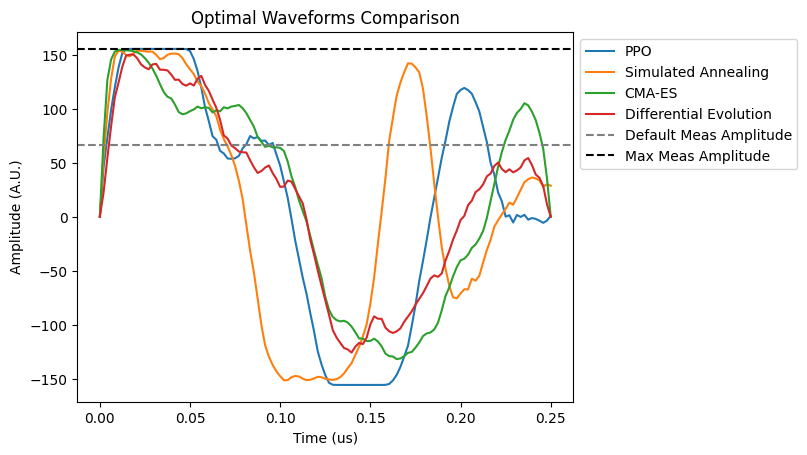

In [42]:
plt.plot(env.ts_action, smooth_action_ppo, label='PPO')
plt.plot(env.ts_action, smooth_action_sim, label='Simulated Annealing')
plt.plot(env.ts_action, smooth_action_cma, label='CMA-ES')
plt.plot(env.ts_action, smooth_action_de, label='Differential Evolution')
plt.axhline(y=env.a0, label='Default Meas Amplitude', linestyle='dashed', color='grey')
plt.axhline(y=env.a0 * env.mu, label='Max Meas Amplitude', linestyle='dashed', color='black')
plt.legend(bbox_to_anchor=(1., 1.))
plt.xlabel('Time (us)')
plt.ylabel('Amplitude (A.U.)')
plt.title('Optimal Waveforms Comparison')
plt.show()

It'll be interesting to analyse learning further through the different objectives (fidelity, duration, smoothness) and how they influence learning as well as the optimal pulses found.